# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [8]:
path_data = '/content/gdrive/MyDrive/RMDS/ke21 Capstone/dataset/2. Brazilian E-Commerce/Data Asli/'

## 2. Import Packages

In [9]:
import pandas as pd
import numpy as np
import sqlite3
import os

In [10]:
os.listdir(path_data)

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'product_category_name_translation.csv',
 'olist_sellers_dataset.csv',
 'Brazilian E-Commerce Public Dataset by Olist.ipynb',
 'data_olist.csv']

## 3. Connect SQLite to Python

In [6]:
path = "/content/gdrive/MyDrive/RMDS/ke21 Capstone/dataset/2. Brazilian E-Commerce/"

In [7]:
os.listdir(path)

['Olist E-commerce.db',
 'Data Description.txt',
 'Data Description.docx',
 'Data Asli',
 'Data Revisi (CSV)']

In [8]:
conn = sqlite3.connect(path + 'Olist E-commerce.db')

In [9]:
cur = conn.cursor()

In [10]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cur.fetchall())

[('Orders',), ('Products',), ('Customers',), ('Sellers',), ('Geolocation',)]


## 4. Data Preparation Using SQL

Berikut adalah tabel Customers

In [11]:
pd.read_sql_query('''
                     SELECT
                           *
                     FROM Customers
                     ''', conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3df704f53d3f1d4818840b34ec672a9f,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
1,f5afca14dfa9dc64251cf2b45c54c363,38cad70d154a4dcc42b598d5c01f7ef1,25211,duque de caxias,RJ
2,be8c14c16a4d47194ccdfe10f1fc5b1a,c86a25b8f5f6c203bb3471553bdc3200,13157,cosmopolis,SP
3,388025bec8128ff20ec1a316ed4dcf02,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
4,05e996469a2bf9559c7122b87e156724,5229b8e4d7d2b9b676c2083c17b1ecd0,93180,portao,RS
...,...,...,...,...,...
10717,ce5efd1b1d8a2fa290a871edd5c26cd6,39fff7cb5873a7116b02234bd1e6c6dc,11320,sao vicente,SP
10718,a046c690e0564ffde0ce611b5eee2c30,4a7ce65ce092885c0af12dc0001457cf,35600,bom despacho,MG
10719,f00bb12620b7b232233cace1b229db18,cf82c9581d66ad1de6b0fe919188bdd6,36026,juiz de fora,MG
10720,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT


terdapat 10722 jumlah baris customer 

Berikut menampilkan tabel Geolocation

In [12]:
pd.read_sql_query('''
                     SELECT
                           *
                     FROM Geolocation
                     ''', conn)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1012,-23.540451,-46.643570
2,1014,-23.542521,-46.635335
3,1020,-23.544207,-46.636281
4,1021,-23.546718,-46.639357
...,...,...,...
7120,99830,-28.069978,-52.008408
7121,99870,-27.883745,-52.233311
7122,99925,-28.386970,-51.845810
7123,99950,-28.068869,-52.012942


Berikut menampilkan tabel Orders

In [13]:
pd.read_sql_query('''
                     SELECT
                           *
                     FROM Orders
                     ''', conn)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,1.0,72d3bf1d3a790f8874096fcf860e3eff,...,1.0,credit_card,1.0,54.36,8f39f09c22b1ceb6e3eb178d8e50bb8a,4.0,None,Gostei do produto,2018-03-13 00:00:00,2018-03-14 10:36:16
1,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,2017-12-15 00:14:55,2017-12-19 01:58:00,2018-01-03 15:09:32,2018-01-16 00:00:00,1.0,60184212dae4e6b0da32bf54271a8c4a,...,1.0,credit_card,10.0,386.33,ffa0d9ba2678dba5fa370295245f473d,4.0,None,"Inicialmente, pedi o cancelamento do pedido de...",2018-01-04 00:00:00,2018-01-04 18:29:06
2,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-15 02:37:29,2018-06-15 14:22:00,2018-06-18 22:32:44,2018-06-26 00:00:00,1.0,7564c1759c04fc0a38f2aa84f7a370ee,...,1.0,boleto,1.0,55.02,b1dafcdfcddb6feb75222b9c1f2baad3,5.0,None,None,2018-06-19 00:00:00,2018-06-20 11:07:14
3,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49
4,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,2.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24 00:00:00,1.0,9e10ae46a3021a02f1692448ef9fa1db,...,1.0,credit_card,4.0,49.75,47697b20bcd3995f870e284fad248ac8,4.0,None,None,2017-10-07 00:00:00,2017-10-09 22:28:51
10997,dfc6eb45a2753ed9e6c6ef4987b44503,a046c690e0564ffde0ce611b5eee2c30,delivered,2018-05-25 17:05:17,2018-05-25 17:15:21,2018-05-29 13:31:00,2018-06-04 23:54:32,2018-06-26 00:00:00,1.0,829002c1d5f40820ebbc6ecd4bcdf3ab,...,1.0,credit_card,4.0,173.63,22503643d52782c09b5151c634233e34,5.0,None,None,2018-06-05 00:00:00,2018-06-08 10:37:13
10998,6ec4642f9993cc34f826cfb9068e5a2f,f00bb12620b7b232233cace1b229db18,delivered,2017-11-21 20:18:03,2017-11-21 20:28:52,2017-11-27 17:18:52,2017-12-02 16:48:46,2017-12-08 00:00:00,1.0,9503faef00966962beacdb4916272305,...,1.0,credit_card,7.0,319.25,d76f6d4e5f6adbc77ec42f047ad47dc7,4.0,None,Comprei também uma resistência avulsa para o c...,2017-12-03 00:00:00,2017-12-04 00:48:17
10999,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,2.0,49d2e2460386273b195e7e59b43587c3,...,1.0,credit_card,2.0,42.42,ebd75732b5804e934123d11ec1f11db0,5.0,None,None,2017-10-21 00:00:00,2017-10-23 14:48:40


Berikut menampilkan tabel Sellers

In [14]:
pd.read_sql_query('''
                     SELECT
                           *  
                     FROM Sellers
                     ''', conn)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP
1,dd55f1bb788714a40e7954c3be6df745,1021,sao paulo,SP
2,e0487761face83d64fcada2408959a36,1021,sao paulo,SP
3,09bad886111255c5b5030314fc7f1a4a,1022,sao paulo,SP
4,f049a72cf58fd31b11f8919cade515e7,1023,sao paulo,SP
...,...,...,...,...
3090,4bde6149c15cf7e177b36fa060dd6de8,99500,carazinho,RS
3091,447d377bdb757058acb569025ee18a93,99500,carazinho,RS
3092,4fae87d32467e18eb46e4a76a0a0b9ce,99670,ronda alta,RS
3093,968ee78631915a63fef426d6733d7422,99700,erechim,RS


Berikut menampilkan tabel Products

In [15]:
pd.read_sql_query('''
                     SELECT 
                           *
                     FROM Products
                     ''', conn)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,72d3bf1d3a790f8874096fcf860e3eff,toys,57.0,341.0,2.0,583.0,20.0,21.0,20.0
1,60184212dae4e6b0da32bf54271a8c4a,watches_gifts,59.0,476.0,2.0,394.0,17.0,11.0,14.0
2,7564c1759c04fc0a38f2aa84f7a370ee,construction_tools_construction,59.0,2432.0,3.0,1200.0,16.0,11.0,11.0
3,a5a0e71a81ae65aa335e71c06261e260,housewares,57.0,698.0,3.0,705.0,34.0,22.0,28.0
4,69d980b4120a76616d7b237d731d6156,watches_gifts,60.0,1362.0,3.0,600.0,16.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...
7018,526f833e1eb0a32ad9351145a761b9ab,watches_gifts,60.0,491.0,2.0,250.0,16.0,2.0,11.0
7019,9e10ae46a3021a02f1692448ef9fa1db,health_beauty,45.0,2231.0,3.0,175.0,21.0,3.0,15.0
7020,829002c1d5f40820ebbc6ecd4bcdf3ab,home_construction,59.0,664.0,1.0,5150.0,30.0,35.0,30.0
7021,9503faef00966962beacdb4916272305,construction_tools_construction,55.0,612.0,1.0,1900.0,35.0,30.0,25.0


## 5. Problem Statement

1.  perlunya informasi berapa banyak produk yang terjual di tiap store yang terkirim ke customer
2.  perlunya informasi produk apa saja yang dapat menjadi rekomendasi agar dapat meningkatan revenue
3.   optimalisasi metode payment terhadap target customer

Berikut informasi jumlah customer berdasarkan kota dan negara

In [16]:
pd.read_sql_query('''
                     SELECT
                           customer_city,
                           customer_state,
                     COUNT (DISTINCT customer_id) jml_customer
                     FROM Customers
                     GROUP BY customer_state
                    ''', conn)

,customer_city,customer_state,jml_customer
0,rio branco,AC,11
1,maceio,AL,42
2,manaus,AM,19
3,santana,AP,5
4,barreiras,BA,391
5,fortaleza,CE,144
6,brasilia,DF,224
7,linhares,ES,246
8,mozarlandia,GO,240
9,urbano santos,MA,85


informasi diatas menunjukan terdapat persebaran customer di 26 Kota dan Negara

berikut informasi jumlah produk berdasarkan jenis kategori produknya dan status pesanannya di masing-masing toko, dan kota dimana toko tersebut berada. 

In [17]:
pd.read_sql_query('''
                      SELECT
                            Orders.customer_id,
                            Orders.order_status,
                            Products.product_category_name,
                      COUNT(DISTINCT Orders.order_id) AS jml_produk,
                      Sellers.seller_city
                      FROM Orders 
                      LEFT JOIN Sellers ON Orders.seller_id = Sellers.seller_id
                      INNER JOIN Products ON Orders.product_id = Products.product_id
                      GROUP BY 2
                      ''', conn)

,customer_id,order_status,product_category_name,jml_produk,seller_city
0,f4656b824844a039a87fd9c51ad3586a,canceled,furniture_decor,50,pirassununga
1,b331b74b18dc79bcdf6532d51e1637c1,delivered,computers_accessories,10416,ilicinea
2,b2a90e07805e2b5d215aac2c3c6eeeec,invoiced,drinks,36,conchal
3,e11ea1af27379694ad1f1fcd1b16ee6c,processing,None,35,curitiba
4,05f74b0eb7b097f9b6180c90576decbf,shipped,health_beauty,105,salto
5,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,perfumery,1,petropolis


Berikut informasi customer dari berbagai negara asalnya yang melakukan transaksi dengan nilai transaksi terbesar  

In [18]:
pd.read_sql_query('''
                      SELECT
                            DISTINCT customer_unique_id,
                            customer_city,
                            customer_state,
                            order_id,
                            payment_type,
                            MAX(payment_value) transac_to_the_max                 
                      FROM Orders
                      LEFT JOIN Customers
                      ON Customers.customer_id = Orders.customer_id
                      GROUP BY customer_state
                                         
                      ''', conn)

,customer_unique_id,customer_city,customer_state,order_id,payment_type,transac_to_the_max
0,None,None,None,None,None,NaN
1,12e92c0f870fc6941c2bfafae6357c4b,rio branco,AC,57be20dc5f786ed372add8e3f28be447,credit_card,646.44
2,361dc89b24a5dc808b2803a1ac33ff3f,maceio,AL,23aee6ac2f5a0a3056aa62c615974c0c,credit_card,1518.55
3,dff33bfc45ae0becc55ce9b50acd4073,manaus,AM,3f49c44f8daf2224823379331514a723,boleto,638.66
4,64d233b65179d3ddf11efaf73a612e8d,macapa,AP,4edb2debfd66979e4c68897c768c36b8,credit_card,466.20
5,fc54c2c09aee36da48881e5bf37ef795,ibotirama,BA,694e3d121f16bcbb9b4595b6c6ab3baf,credit_card,2732.06
6,910f0afb84bc778e856d3683c7e8a46a,fortaleza,CE,198cbd4bd806061597b3f8fbdf126ad6,credit_card,1200.00
7,14cf3e40a2b5076d2d0384a7e68ca06f,brasilia,DF,607911c4ac62f9038b4ec434673e486e,credit_card,1916.08
8,763c8b1c9c68a0229c42c9fc6f662b93,vila velha,ES,736e1922ae60d0d6a89247b851902527,boleto,7274.88
9,5d0a2980b292d049061542014e8960bf,goiania,GO,b4c4b76c642808cbe472a32b86cddc95,credit_card,4809.44


dapat dilihat pada tabel diatas ada 27 customer yang melakukan transaksi terbesar 

Berikut informasi angka penjualan per-tahun

In [19]:
pd.read_sql_query('''
                     SELECT
                           strftime("%Y %m", order_purchase_timestamp) AS YEAR,
                           COUNT(order_id) AS NumOfOrders
                     FROM Orders
                    GROUP BY 1
                    ORDER BY 1
                             ''', conn)

,YEAR,NumOfOrders
0,None,0
1,2016 09,3
2,2016 10,32
3,2017 01,102
4,2017 02,210
5,2017 03,295
6,2017 04,246
7,2017 05,402
8,2017 06,323
9,2017 07,470


In [20]:
pd.read_sql_query('''
                     SELECT
                           strftime("%Y %m", order_purchase_timestamp) AS YEAR,
                           COUNT(order_id) AS NumOfOrders
                     FROM Orders
                     WHERE strftime("%Y %m",order_purchase_timestamp) NOT IN ("NONE","2016 09")
                    GROUP BY 1
                    ORDER BY 1
                    ''', conn)

,YEAR,NumOfOrders
0,2016 10,32
1,2017 01,102
2,2017 02,210
3,2017 03,295
4,2017 04,246
5,2017 05,402
6,2017 06,323
7,2017 07,470
8,2017 08,475
9,2017 09,492


Berikut menampilkan informasi pesanan yang statusnya sudah delivered

In [21]:
order_status_delivered = pd.read_sql_query('''
                                              SELECT 
                                                    COUNT (DISTINCT order_id) jml_order_id,
                                                    order_status 
                                              FROM Orders 
                                              WHERE order_status = 'delivered' 
                                              ''', conn)
order_status_delivered

,jml_order_id,order_status
0,10416,delivered


Berikut informasi nilai total transaksi per-tahun dari masing-masing seller/toko di tiap kota dan negara

In [22]:
pd.read_sql_query('''
                    SELECT
                          DISTINCT order_id,
                          STRFTIME('%Y',order_purchase_timestamp) year_of_purchase,
                          COUNT(DISTINCT order_approved_at) order_approved,
                          payment_value,
                          SUM (DISTINCT order_approved_at * payment_value) total_pay_val,
                          seller_city,
                          seller_state
                    FROM Orders
                    LEFT JOIN Sellers
                    ON Sellers.seller_id = Orders.seller_id
                    GROUP BY 2  
                     ''', conn)

,order_id,year_of_purchase,order_approved,payment_value,total_pay_val,seller_city,seller_state
0,None,None,0,NaN,NaN,None,None
1,2d9e3c3c7f0f3ba8a8fa3db2f1211ceb,2016,33,676.92,9.658092e+06,londrina,PR
2,9115830be804184b91f5c00f6f49f92d,2017,4836,42.42,1.412621e+09,nova iguacu,RJ
3,11c177c8e97725db2631073c19f07b62,2018,5721,441.16,1.794408e+09,ilicinea,MG


In [23]:
pd.read_sql_query('''
                      SELECT
                            order_id,
                            order_item_id,
                            payment_sequential,
                            payment_type,
                            payment_installments,
                            order_approved_at
                      FROM Orders
                      GROUP BY payment_type
                      
                      ''', conn)

,order_id,order_item_id,payment_sequential,payment_type,payment_installments,order_approved_at
0,bfbd0f9bdef84302105ad712db648a6c,3.0,NaN,None,NaN,2016-09-15 12:16:38
1,b4cec7d0224b919cac7a6d513cc0884f,1.0,1.0,boleto,1.0,2018-02-07 02:56:12
2,11c177c8e97725db2631073c19f07b62,2.0,1.0,credit_card,4.0,2018-01-08 21:36:21
3,b2452c55b7dd1d12fca2480a7dbde11e,1.0,1.0,debit_card,1.0,2018-07-24 10:31:19
4,4e60165d68af3fa7c25bfa95ea5803ff,1.0,1.0,voucher,1.0,2017-07-25 14:50:23


berikut menampilkan informasi banyaknya jumlah pesanan berdasarkan masing-masing statusnya  

In [24]:
pd.read_sql_query('''
                      SELECT
                            order_id,
                            customer_id,
                            order_status,
                            order_item_id, 
                      COUNT(order_status) AS jml_pesanan 
                      FROM Orders 
                      GROUP BY order_status
                      ''', conn)

,order_id,customer_id,order_status,order_item_id,jml_pesanan
0,None,2017-09-09 00:00:00,2017-09-11 01:28:36,NaN,1
1,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,NaN,68
2,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,NaN,1
3,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2.0,10684
4,d1af798bd24f3f874cf16d2d2e02d981,b2a90e07805e2b5d215aac2c3c6eeeec,invoiced,1.0,38
5,d6ae7c61d30bf46350c4c3a7c6627f26,e11ea1af27379694ad1f1fcd1b16ee6c,processing,1.0,38
6,7d9dad1ac923f80a77b7a8fdd10a7201,05f74b0eb7b097f9b6180c90576decbf,shipped,1.0,109
7,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,NaN,62


Berikut informasi jumlah customer sesuai kotanya masing-masing yang memiliki pesanan pada toko/seller, dan informasi kota dimana toko tersebut berada.     

In [25]:
pd.read_sql_query('''
                     SELECT
                           Customers.customer_id,
                           Customers.customer_city,
                           Customers.customer_state,
                           Orders.order_status,
                           Sellers.seller_city,
                     COUNT(Customers.customer_id) AS jml_cust
                     FROM Customers
                     LEFT JOIN Orders ON Orders.customer_id = Customers.customer_id
                     INNER JOIN Sellers ON Orders.seller_id = Sellers.seller_id
                     GROUP BY 4
                     ''', conn)

,customer_id,customer_city,customer_state,order_status,seller_city,jml_cust
0,f4656b824844a039a87fd9c51ad3586a,americana,SP,canceled,pirassununga,51
1,b331b74b18dc79bcdf6532d51e1637c1,japuiba,RJ,delivered,ilicinea,10684
2,b2a90e07805e2b5d215aac2c3c6eeeec,barretos,SP,invoiced,conchal,38
3,e11ea1af27379694ad1f1fcd1b16ee6c,sao paulo,SP,processing,curitiba,38
4,05f74b0eb7b097f9b6180c90576decbf,sao paulo,SP,shipped,salto,108
5,3d8e326c3cef3a9bba7ca121baac5fc3,porto alegre,RS,unavailable,petropolis,1


## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

menyalin file .csv menjadi data frame menggunakan pd.read_csv()

In [11]:
df_customer = pd.read_csv(path_data + "olist_customers_dataset.csv")
df_sellers = pd.read_csv(path_data + "olist_sellers_dataset.csv")
df_prod_cat_nm_tr = pd.read_csv(path_data + "product_category_name_translation.csv")
df_prod = pd.read_csv(path_data + "olist_products_dataset.csv")
df_orders = pd.read_csv(path_data + "olist_orders_dataset.csv")
df_order_pay = pd.read_csv(path_data + "olist_order_payments_dataset.csv") 
df_order_item = pd.read_csv(path_data + "olist_order_items_dataset.csv")
df_order_review = pd.read_csv(path_data + "olist_order_reviews_dataset.csv")
df_geo = pd.read_csv(path_data + "olist_geolocation_dataset.csv") 

In [12]:
df_prod_cat_nm_tr.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
df_prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


replace kolom product_category_name di df_prod menggunakan df_prod_cat_nm_tr

In [14]:
df_prod = df_prod.merge(df_prod_cat_nm_tr, on='product_category_name', how='left')
df_prod.drop ('product_category_name', axis=1, inplace=True)

In [15]:
df_prod.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


MERGE to df_olist

In [16]:
# menggabungkan semua tabel menjadi satu kedalam dataframe
df_olist = df_orders.merge(df_order_item, on='order_id', how='left')
df_olist = df_olist.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_olist = df_olist.merge(df_order_review, on='order_id', how='outer')
df_olist = df_olist.merge(df_prod, on='product_id', how='outer')
df_olist = df_olist.merge(df_customer, on='customer_id', how='outer')
df_olist = df_olist.merge(df_sellers, on='seller_id', how='outer')  

preview df_olist

In [17]:
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP


CLEAN DATA

In [18]:
# default title and message
df_olist['review_comment_title'] = df_olist['review_comment_title'].fillna('No title')
df_olist['review_comment_message'] = df_olist['review_comment_message'].fillna('No message')

cek df_olist apakah ada duplikasi value

In [19]:
df_olist.duplicated().sum()

0

In [43]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [44]:
df_geo.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [51]:
df_geo.shape

(1000163, 5)

DROP Nan Values

In [20]:
before_drop = df_olist.shape[0]
df_olist = df_olist.dropna()
after_drop = df_olist.shape[0]
print(f'There is {round(((before_drop-after_drop)/after_drop)*100,2)}% nan values')

There is 4.47% nan values


In [21]:
# KONVERSI TANGGAL
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 119150
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114050 non-null  object 
 1   customer_id                    114050 non-null  object 
 2   order_status                   114050 non-null  object 
 3   order_purchase_timestamp       114050 non-null  object 
 4   order_approved_at              114050 non-null  object 
 5   order_delivered_carrier_date   114050 non-null  object 
 6   order_delivered_customer_date  114050 non-null  object 
 7   order_estimated_delivery_date  114050 non-null  object 
 8   order_item_id                  114050 non-null  float64
 9   product_id                     114050 non-null  object 
 10  seller_id                      114050 non-null  object 
 11  shipping_limit_date            114050 non-null  object 
 12  price                         

In [22]:
df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist.order_purchase_timestamp)
df_olist['order_approved_at'] = pd.to_datetime(df_olist.order_approved_at)
df_olist['order_delivered_carrier_date'] = pd.to_datetime(df_olist.order_delivered_carrier_date)
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist.order_delivered_customer_date)
df_olist['order_estimated_delivery_date'] = pd.to_datetime(df_olist.order_estimated_delivery_date)
df_olist['shipping_limit_date'] = pd.to_datetime(df_olist.shipping_limit_date)
df_olist['review_creation_date'] = pd.to_datetime(df_olist.review_creation_date)

cek kembali 

In [23]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 119150
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114050 non-null  object        
 1   customer_id                    114050 non-null  object        
 2   order_status                   114050 non-null  object        
 3   order_purchase_timestamp       114050 non-null  datetime64[ns]
 4   order_approved_at              114050 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114050 non-null  datetime64[ns]
 6   order_delivered_customer_date  114050 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114050 non-null  datetime64[ns]
 8   order_item_id                  114050 non-null  float64       
 9   product_id                     114050 non-null  object        
 10  seller_id                      114050 non-null  object        
 11  

Preview df_olist

In [24]:
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP


In [25]:
df_olist.to_csv(path_data + 'data_olist.csv')

## 7. Exploratory Data Analysis & Visualization

In [ ]:
#Berapa banyak pesanan yang dilakukan berdasarkan statusnya?

#Bagaimana persebaran customer berdasarkan state, region dan city?

#Bagaimana tren penjualan dalam periode tertentu?

In [26]:
list(df_olist)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

In [27]:
!pip install plotly==4.14.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

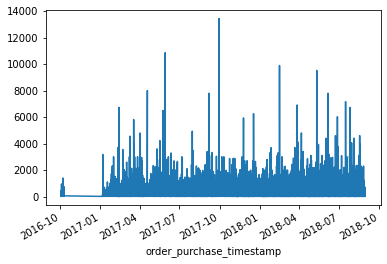

In [29]:
sales_by_time= df_olist.groupby(['order_purchase_timestamp'])['price'].sum().plot()

In [36]:
df_olist['year'] = df_olist['order_purchase_timestamp'].dt.year
df_olist['month'] = df_olist['order_purchase_timestamp'].dt.month

In [37]:
df_bmx = df_olist.groupby('month')['price'].mean().reset_index()

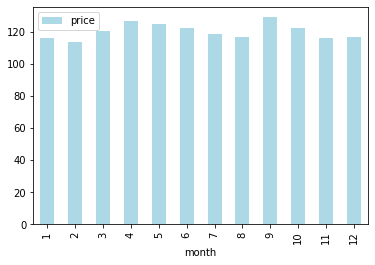

In [38]:
df_bmx.plot(x = 'month', 
            y=['price'], 
            kind = 'bar', 
            color = ['lightblue', 'red', 'yellow'], 
            fontsize=10)

Berikut informasi dari mana saja customer terbanyak berasal 

Text(0, 0.5, 'Number of Customers')

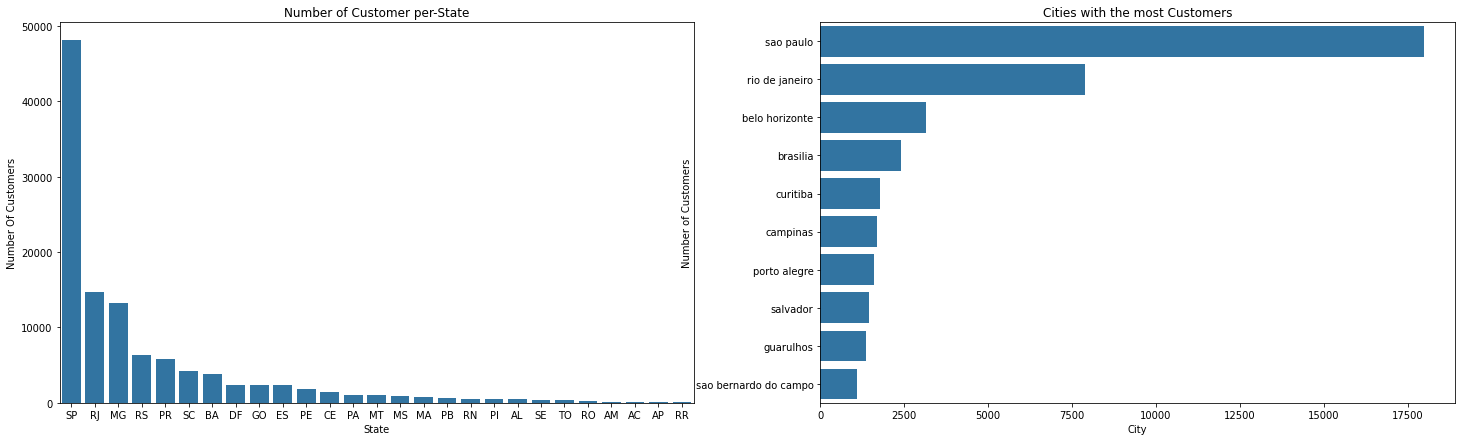

In [ ]:
state_cust = df_olist.groupby('customer_state').count()['customer_id'].reset_index()
city_cust = df_olist.groupby('customer_city').count()['customer_id'].reset_index()

plt.figure(figsize = (25,7))

plt.subplot(121)
base_color = sns.color_palette()[0]

sns.barplot(data = state_cust.sort_values('customer_id', ascending = False), x = 'customer_state', y = 'customer_id', color = base_color)
plt.title('Number of Customer per-State')
plt.xlabel('State')
plt.ylabel('Number Of Customers')

plt.subplot(122)
base_color = sns.color_palette()[0]

sns.barplot(data = city_cust.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', y = 'customer_city', color = base_color)
plt.title('Cities with the most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')

Customers terbanyak adalah berasal dari kota dan negara sao paulo dan rio de janeiro, hal ini menguatkan informasi bahwa populasi terbanyak di Bazil berasal dari 2 kota ini.

Berikut adalah informasi nama produk apa saja yang paling banyak dan paling sedikit diorder

Text(0, 0.5, 'Product')

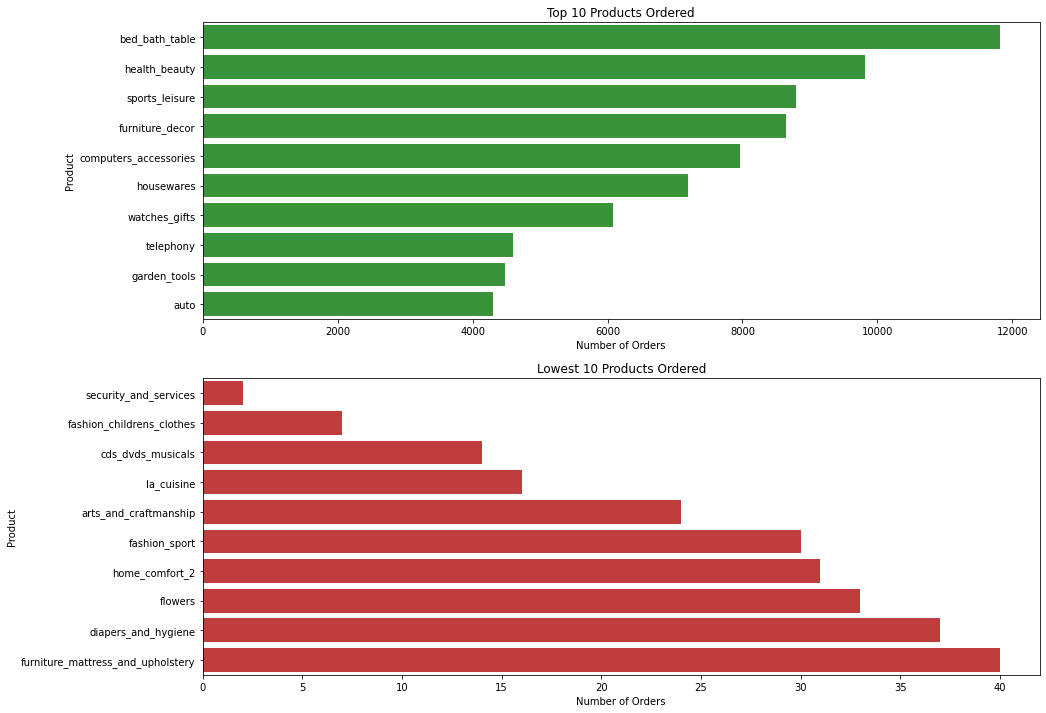

In [ ]:
top_products = df_olist['product_category_name_english'].value_counts().reset_index().nlargest(10,'product_category_name_english')
lowest_products = df_olist['product_category_name_english'].value_counts().reset_index().nsmallest(10,'product_category_name_english')

plt.figure(figsize = (15,12))
red_color = sns.color_palette()[3]
green_color = sns.color_palette()[2]

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name_english', y = 'index', color = green_color)
plt.title('Top 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name_english', y = 'index', color = red_color)
plt.title('Lowest 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product')

Produk yang paling terbanyak di order adalah bed_bath_table, health_beauty, sports_leisure dan seterusnya sesuai urutan 10 besar. Sedangkan untuk urutan produk terendah adalah security_and_services, fashion_childrens_clothes, cds_dvds_musicals dan seterusnya sesuai urutan.

Berikut adalah informasi tipe pembayaran yang terbanyak di gunakan

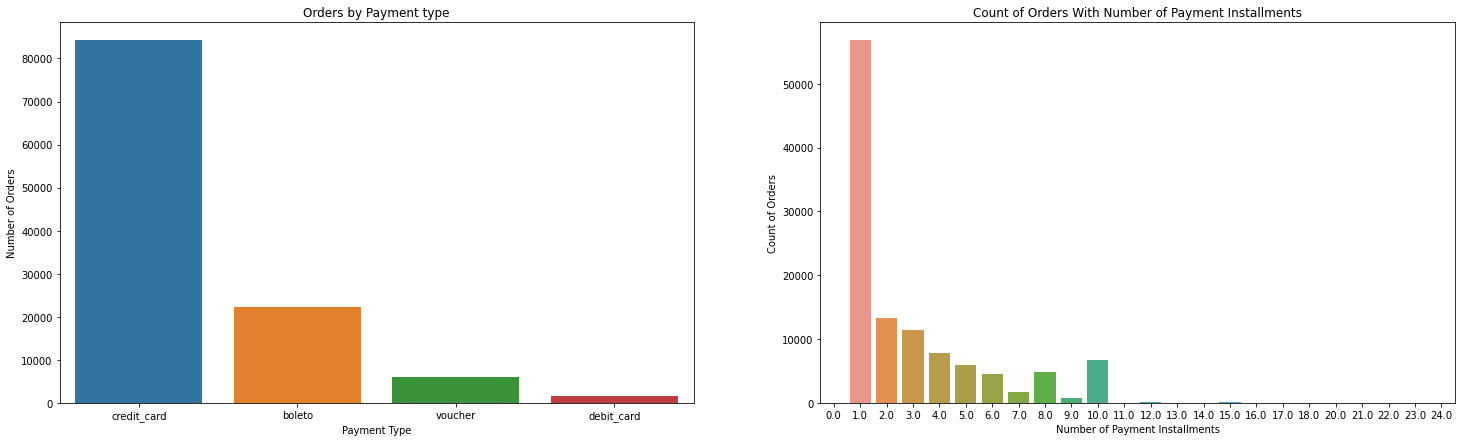

In [ ]:
payments_types = df_olist['payment_type'].value_counts().reset_index()

plt.figure(figsize = (25,7))

plt.subplot(121)
sns.barplot(data = payments_types, x = 'index', y = 'payment_type')
plt.title('Orders by Payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders');


plt.subplot(122)
sns.barplot(data = df_olist['payment_installments'].value_counts().reset_index(), x = 'index', y = 'payment_installments')
plt.title('Count of Orders With Number of Payment Installments')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Orders')

Pada grafik sebelah kiri adalah order yang terhitung berdasarkan tipe pembayaran yang digunakan, terlihat jika penggunaan credit_card jauh lebih besar ketimbang 3 jenis tipe pembayaran lainnya.

Pada grafik sebelah kanan adalah order yang terhitung berdasarkan payment_installments (angsuran) yang dipilih dan terlihat jika angsuran 1 adalah terbanyak dan selanjutnya menurun sesuai urutan dan ada sedikit peningkatan pada nomor 8 dan 10

Berikut adalah informasi produk apa saja yang mendapatkan rating terbanyak

Text(0, 0.5, 'Review Score')

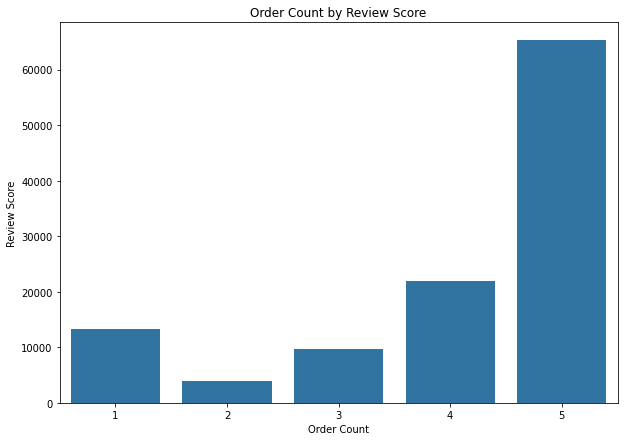

In [ ]:
base_color = sns.color_palette()[0]

plt.figure(figsize = (10,7))
sns.barplot(data = df_olist.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = base_color)
plt.title('Order Count by Review Score')
plt.xlabel('Order Count')
plt.ylabel('Review Score')

Nilai rating tertinggi adalah dengan memberi 5 bintang dan selanjutnya menurun sesuai urutan, kecuali untuk bintang 1 nilai ratingnya lebih banyak ketimbang 2 dan 3 

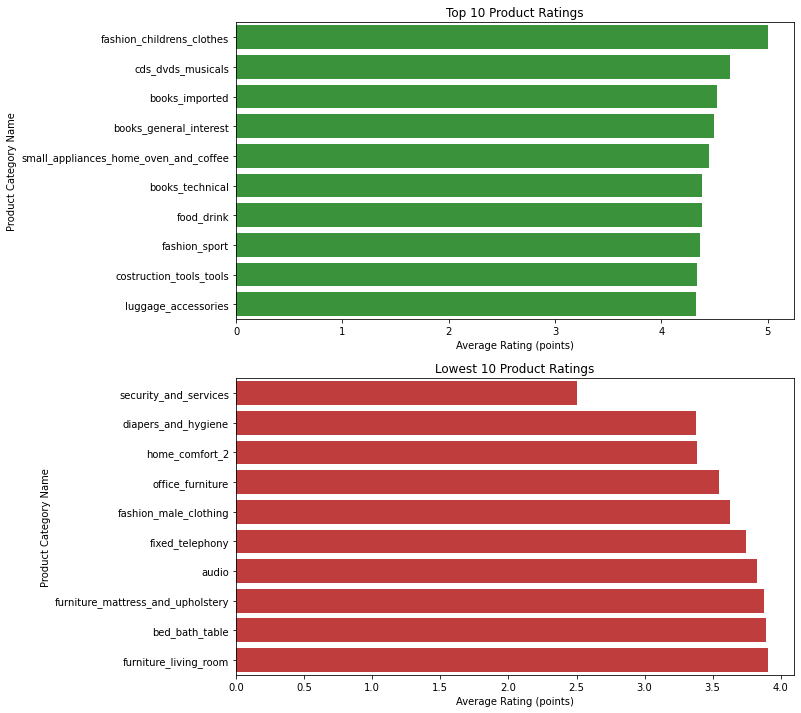

In [ ]:
prod_rev_means = df_olist.groupby('product_category_name_english').mean()['review_score'].reset_index()
top_10_ratings = prod_rev_means.sort_values('review_score', ascending = False).nlargest(10,'review_score')
lowest_10_ratings = prod_rev_means.sort_values('review_score', ascending = False).nsmallest(10,'review_score')

plt.figure(figsize = (10,12))

sns.barplot(data = df_olist.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = base_color)
plt.title('Order Count by Review Score')
plt.xlabel('Order Count')
plt.ylabel('Review Score');

plt.subplot(211)
sns.barplot(data = top_10_ratings, x = 'review_score', y = 'product_category_name_english', color = green_color)
plt.title('Top 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name');


plt.subplot(212)
sns.barplot(data = lowest_10_ratings, x = 'review_score', y = 'product_category_name_english', color = red_color)
plt.title('Lowest 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name');

## 8. Rekomendasi

1.   Customers terbanyak berasal dari negara dan kota Sao Paul dan rio de janeiro
2.   Bed and bath products merupakan top products yang terbanyak di order selanjutnya yaitu beauty products, dan sports leisure products.
3.   Security services merupakan jumlah products terendah yang di order, lalu diikuti oleh kids clothes, dan cds dvds musicals.
4.   Tipe pembayaran menggunakan kartu kedit lebih banyak di pilih untuk digunakan ketimbang pilihan tipe pembayaran yang lainnya.
5.   Yang terbanyak dari pilihan payment installments adalah 1.
6.   movies dan music mendapatkan reviews terbaik.
sedangkan Insurance Services mendapatkan review terburuk.

## 9. Kesimpulan - Create the story